In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , ConfusionMatrixDisplay , classification_report
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as st
from sklearn.feature_selection import f_classif , f_oneway , f_classif , SelectKBest
from sklearn.preprocessing import FunctionTransformer
from feature_engine.outliers import Winsorizer

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\Brain-tumor-detection.csv")
df.head()

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


In [3]:
df.drop('Unnamed: 0' , axis=1 , inplace=True)

In [4]:
df.drop('Eccentricity' , axis=1 , inplace=True)

In [5]:
df.drop_duplicates(inplace=True)

Area                      Axes(0.125,0.712609;0.352273x0.167391)
Perimeter              Axes(0.547727,0.712609;0.352273x0.167391)
Convex Area               Axes(0.125,0.511739;0.352273x0.167391)
Solidity               Axes(0.547727,0.511739;0.352273x0.167391)
Equivalent Diameter        Axes(0.125,0.31087;0.352273x0.167391)
Major Axis              Axes(0.547727,0.31087;0.352273x0.167391)
Minor Axis                    Axes(0.125,0.11;0.352273x0.167391)
Class                      Axes(0.547727,0.11;0.352273x0.167391)
dtype: object

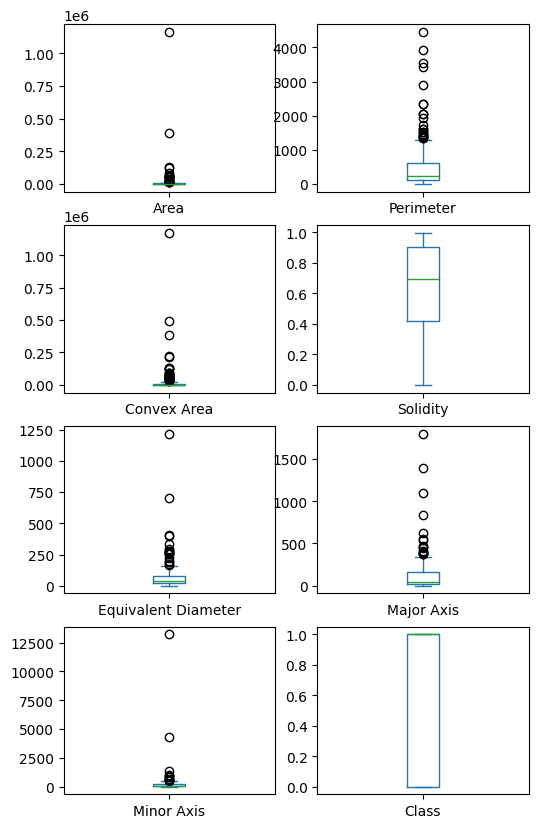

In [6]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df.plot(kind = 'box' , subplots = True , layout = (4,2) , figsize=(6,10))

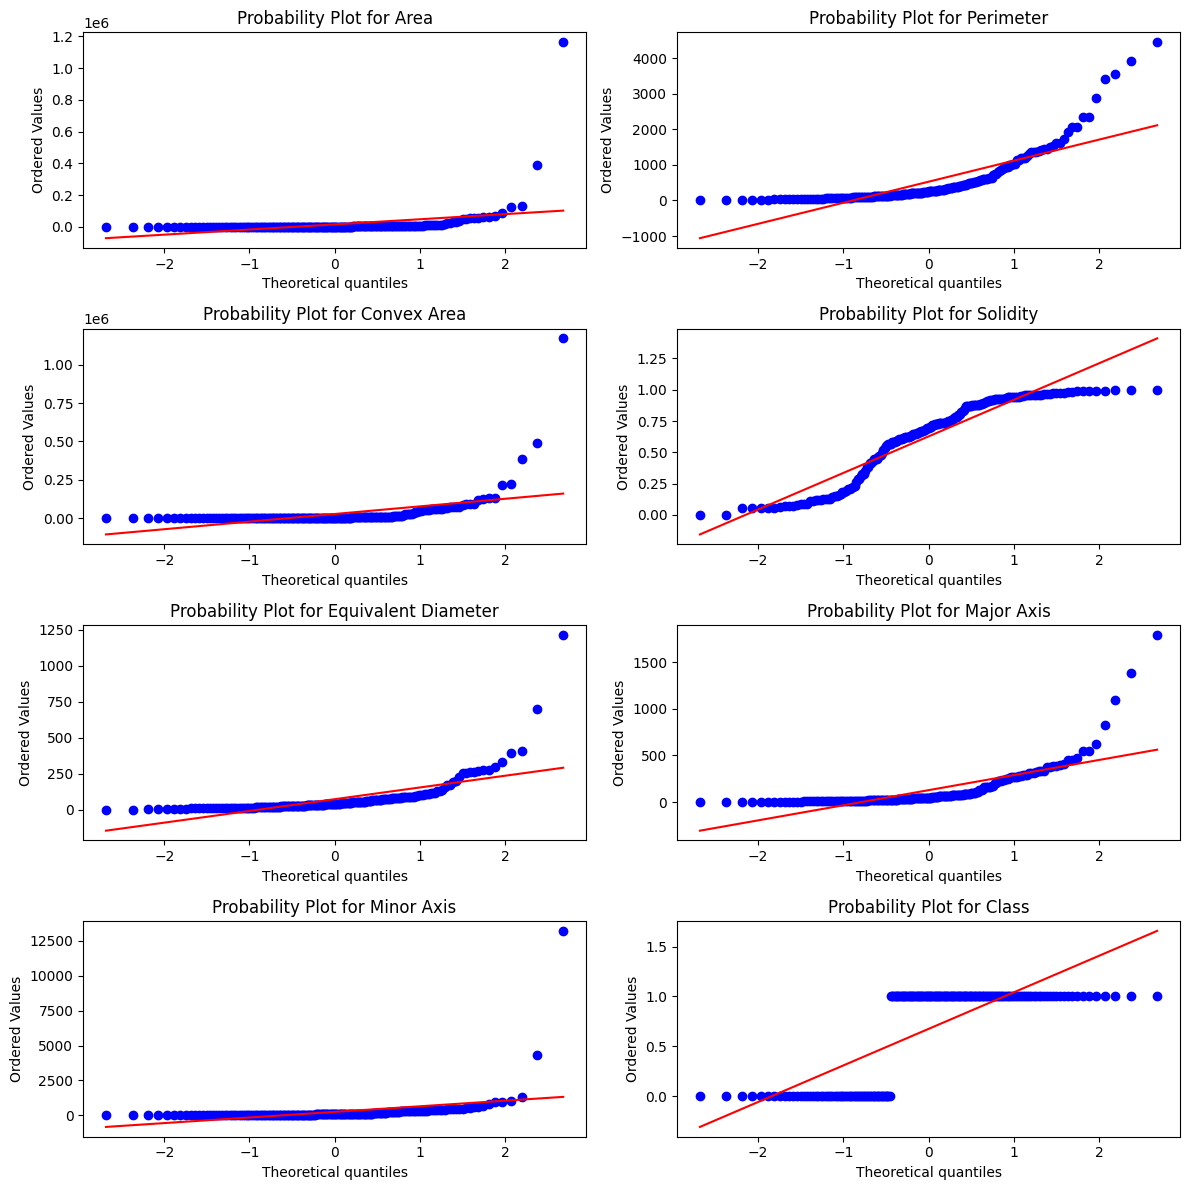

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

axs = axs.flatten()

for i, col in enumerate(df):
    st.probplot(df[col], plot=axs[i])
    axs[i].set_title(f'Probability Plot for {col}')

plt.tight_layout()
plt.show()

In [36]:
X = df.drop('Class' , axis=1)
y = df['Class']

best = SelectKBest(f_oneway, k = 6)
X = pd.DataFrame(best.fit_transform(X,y) , columns=best.get_feature_names_out())
X

,Area,Perimeter,Convex Area,Equivalent Diameter,Major Axis,Minor Axis
0,6314.5,521.972649,9855.5,89.665328,86.297539,146.952896
1,52776.5,1189.820409,59947.0,259.224086,209.590240,405.861420
2,50232.5,1415.349410,69628.5,252.899200,223.632736,373.077637
3,4486.0,275.622365,4741.5,75.576138,64.818382,93.083397
4,145.0,92.083260,323.5,13.587484,16.900970,28.915043
...,...,...,...,...,...,...
185,545.5,208.267025,1317.5,26.354358,28.902472,64.973869
186,902.0,232.166520,1444.5,33.888967,30.549131,62.921772
187,3177.0,217.681239,3260.0,63.600959,63.508198,66.241142
188,6103.0,1208.631593,51259.5,88.150899,280.000031,285.934113


In [37]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=13)

In [38]:
num_col = X_train.select_dtypes(exclude='object').columns

In [39]:
num_col

Index(['Area', 'Perimeter', 'Convex Area', 'Equivalent Diameter', 'Major Axis',
       'Minor Axis'],
      dtype='object')

In [40]:
win = Winsorizer(capping_method='mad' , tail='both' , fold=5)
win.fit(X_train[num_col])
X_train[num_col] = win.transform(X_train[num_col])
X_train[num_col]

,Area,Perimeter,Convex Area,Equivalent Diameter,Major Axis,Minor Axis
12,395.000000,76.083260,408.500000,22.426092,22.053640,23.882542
80,9268.722594,1353.307783,15768.010567,227.597684,300.722738,422.119476
121,8056.000000,640.724959,13503.500000,101.277923,81.612198,212.267380
18,9268.722594,938.364567,15768.010567,227.597684,242.073410,319.204437
64,2757.000000,271.563488,3692.000000,59.247966,67.494522,78.636452
...,...,...,...,...,...,...
98,2080.500000,255.663994,2674.500000,51.468193,48.154263,67.003876
16,6403.500000,1417.887007,15768.010567,90.295013,300.722738,429.053940
74,152.500000,56.041630,174.500000,13.934455,12.639631,21.114088
176,458.000000,383.043719,2979.500000,24.148369,166.128983,256.143524


In [41]:
X_test[num_col] = win.transform(X_test[num_col])
X_test[num_col]

,Area,Perimeter,Convex Area,Equivalent Diameter,Major Axis,Minor Axis
79,6468.500000,358.575681,7214.000000,90.752135,81.936165,110.755920
102,4464.000000,448.073155,6076.000000,75.390592,65.002991,111.566879
137,2191.000000,612.357426,6217.000000,52.817306,74.357567,81.118240
159,2233.000000,603.754395,8434.500000,53.321139,300.722738,373.502625
175,7465.000000,1417.887007,15768.010567,97.492221,300.722738,429.053940
89,1262.500000,430.315796,4364.000000,40.093203,68.488899,74.337578
107,3630.500000,379.605120,5142.500000,67.988942,63.715851,104.394676
94,800.000000,402.676188,3937.000000,31.915382,67.974564,117.241447
87,585.500000,120.325901,783.500000,27.303512,27.716181,37.491096
23,3294.500000,1147.075244,15768.010567,64.766409,288.832275,329.591522


In [42]:
def sqrt(n):
    return np.sqrt(n)

func = FunctionTransformer(func=sqrt)
func.fit(X_train[num_col])
X_train[num_col] = func.transform(X_train[num_col])
X_train[num_col]

,Area,Perimeter,Convex Area,Equivalent Diameter,Major Axis,Minor Axis
12,19.874607,8.722572,20.211383,4.735620,4.696130,4.886977
80,96.274205,36.787332,125.570739,15.086341,17.341359,20.545546
121,89.755223,25.312545,116.204561,10.063693,9.033947,14.569399
18,96.274205,30.632737,125.570739,15.086341,15.558708,17.866293
64,52.507142,16.479183,60.761830,7.697270,8.215505,8.867720
...,...,...,...,...,...,...
98,45.612498,15.989496,51.715568,7.174134,6.939327,8.185590
16,80.021872,37.654840,125.570739,9.502369,17.341359,20.713617
74,12.349089,7.486096,13.209845,3.732888,3.555226,4.595007
176,21.400935,19.571503,54.584796,4.914099,12.889103,16.004485


In [43]:
X_test[num_col] = func.transform(X_test[num_col])
X_test[num_col]

,Area,Perimeter,Convex Area,Equivalent Diameter,Major Axis,Minor Axis
79,80.426986,18.936095,84.935269,9.526391,9.051860,10.524064
102,66.813172,21.167739,77.948701,8.682776,8.062443,10.562522
137,46.808119,24.745857,78.847955,7.267552,8.623083,9.006567
159,47.254629,24.571414,91.839534,7.302133,17.341359,19.326216
175,86.400231,37.654840,125.570739,9.873815,17.341359,20.713617
89,35.531676,20.744054,66.060578,6.331919,8.275802,8.621924
107,60.253631,19.483458,71.711226,8.245541,7.982221,10.217371
94,28.284271,20.066793,62.745518,5.649370,8.244669,10.827809
87,24.197107,10.969316,27.991070,5.225276,5.264616,6.122997
23,57.397735,33.868499,125.570739,8.047758,16.995066,18.154656


In [44]:
gnb = GaussianNB()
gnb.fit(X_train , y_train)

y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

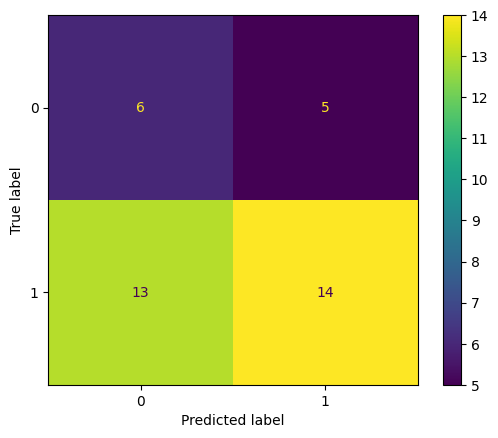

In [45]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred)).plot()

In [46]:
accuracy_score(y_test , y_pred)

0.5263157894736842

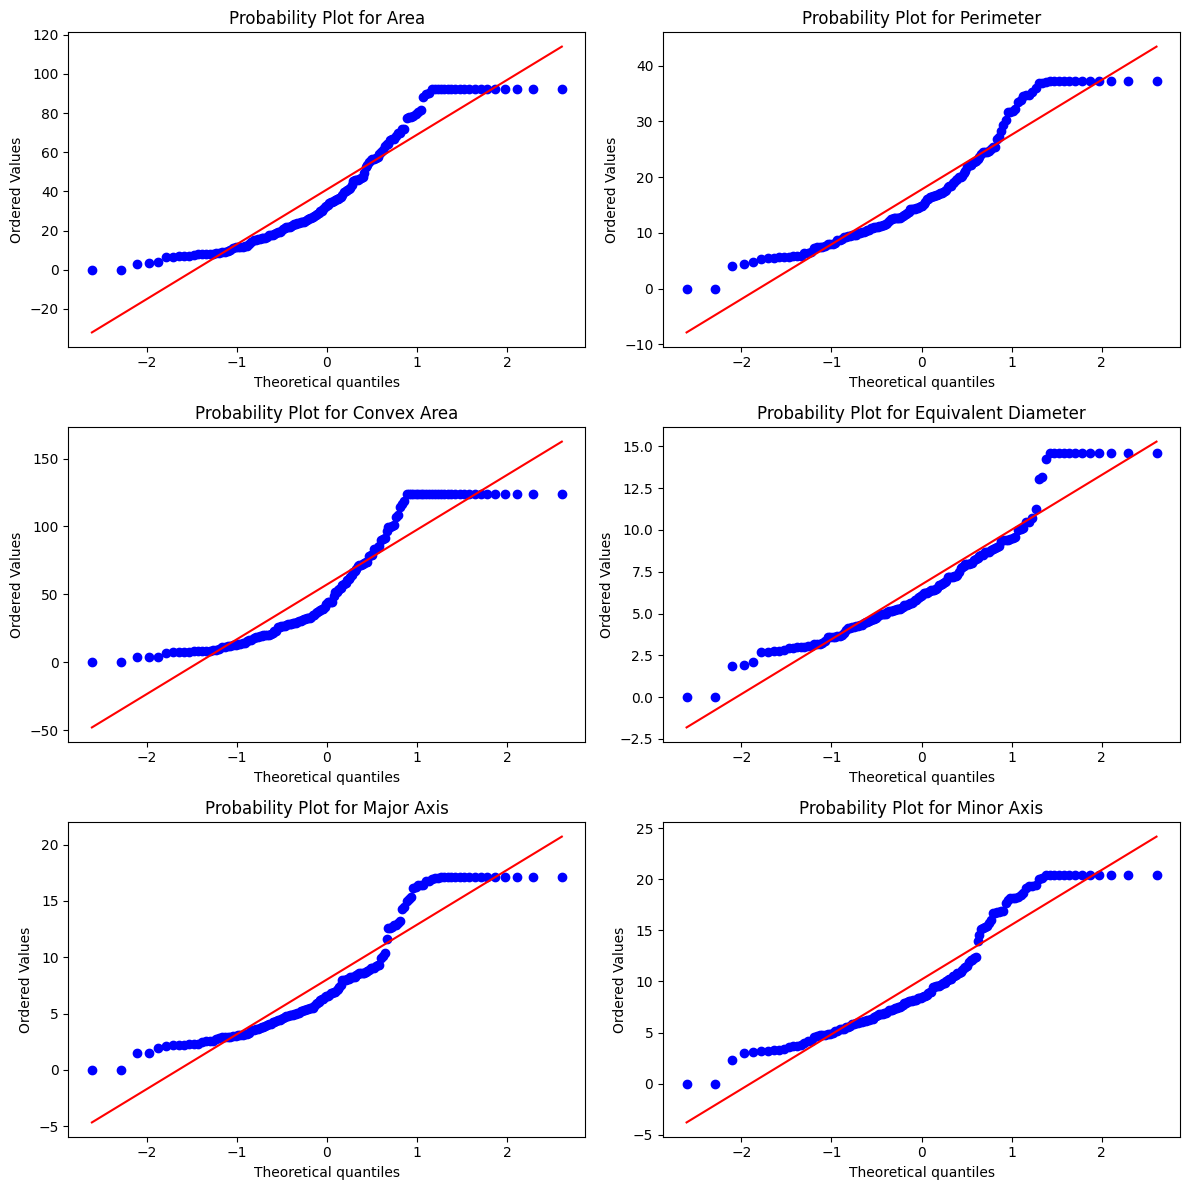

In [27]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

axs = axs.flatten()

for i, col in enumerate(X_train):
    st.probplot(X_train[col], plot=axs[i])
    axs[i].set_title(f'Probability Plot for {col}')

plt.tight_layout()
plt.show()

In [26]:
X_train

,Area,Perimeter,Convex Area,Equivalent Diameter,Major Axis,Minor Axis
51,43.040678,17.122462,53.146025,6.968946,6.778720,8.695674
35,27.083205,12.048001,30.331502,5.528121,4.453999,7.541388
118,92.113456,29.315423,123.605511,14.575861,15.134907,16.840371
60,17.521415,8.836473,18.439089,4.446437,3.760085,5.557555
161,57.144554,27.271545,99.491206,8.029989,9.246475,11.290859
...,...,...,...,...,...,...
106,78.275156,19.109199,83.564346,9.398088,9.014467,10.065943
14,34.066112,14.268172,40.914545,6.199959,5.199946,8.366520
92,18.193405,11.627380,28.257742,4.530901,7.338923,9.884351
179,23.780244,13.818586,35.007142,5.180071,6.630433,7.212948
